# Project: Medical Appointment No Shows!

Quadri Abdul Fatai 2021

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project I have investigated a dataset of appoinment records for Brasil public hospitals. The data includes some attributes of patients and state if the patients showed up to appointments. The analysis is focused on finding trends influencing patients to show or not show up to appointments.

The original problem description and data set can be found here: https://www.kaggle.com/joniarroba/noshowappointments/home

### Dataset Description

<table>
    <tr>
        <th>Name</th>
        <th>Value(s)</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>PatienID</td>
        <td>number</td>
        <td>identification of a patient</td>
    </tr>
    <tr>
        <td>AppointmentID</td>
        <td>number</td>
        <td>identification of each appointment</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td>F or M</td>
        <td>it says 'F' if female or 'M' if man</td>
    </tr>
    <tr>
        <td>ScheduledDay</td>
        <td>date</td>
        <td>tells us on what day the patient set up their appointment</td>
    </tr>
    <tr>
        <td>AppointmentDay</td>
        <td>date</td>
        <td>the day of the actuall appointment, when they have to visit the doctor</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>number</td>
        <td>how old is the patient</td>
    </tr>
    <tr>
        <td>Neighbourhood</td>
        <td>string</td>
        <td>indicates the location of the hospital</td>
    </tr>
    <tr>
        <td>Scholarship</td>
        <td>0 or 1</td>
        <td>indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família</td>
    </tr>
    <tr>
        <td>Hipertension</td>
        <td>0 or 1</td>
        <td>indicates if the patient has hipertension</td>
    </tr>
    <tr>
        <td>Diabetes</td>
        <td>0 or 1</td>
        <td>indicates if the patient has diabetes</td>
    </tr>
    <tr>
        <td>Alcoholism</td>
        <td>0 or 1</td>
        <td>indicates if the patient is an alcoholic</td>
    </tr>
    <tr>
        <td>Handcap</td>
        <td>0 or 1</td>
        <td>indicates if the patient is handicaped</td>
    </tr>
    <tr>
        <td>SMS_received</td>
        <td>0 or 1</td>
        <td>1 or more messages sent to the patient</td>
    </tr>
    <tr>
        <td>No-show</td>
        <td>Yes or No</td>
        <td>it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up</td>
    </tr>
</table>


<a id='wrangling'></a>
## Data Wrangling

In [75]:
# import statements for all of the packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
# Load your data and print out a few lines. 
# df = pd.read_csv('KaggleV2-May-2016.csv')

#the scheduledDay and AppointmentDay has to be converted to datetime type

df = pd.read_csv('KaggleV2-May-2016.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [78]:
#A quick description of the data types
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [79]:
#checking for missing data
np.sum(df.isnull())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [80]:
#check for duplicate data
np.sum(df.duplicated())

0

In [126]:
#checked schedulde time column
df['ScheduledTime'] = df['ScheduledDay'].dt.time
df['ScheduledTime'].head()

0    18:38:08
1    16:08:27
2    16:19:04
3    17:29:31
4    16:07:23
Name: ScheduledTime, dtype: object

In [82]:
# Get the hour of the day the appoiintment was scheduleld
df['hourScheduled'] = df['ScheduledDay'].dt.hour

In [83]:
df['hourScheduled'].head()

0    18
1    16
2    16
3    17
4    16
Name: hourScheduled, dtype: int64

In [127]:
#frequency of scheduled hour
df['hourScheduled'].value_counts()

7     19213
8     15349
9     12823
10    11056
14     9127
13     9036
11     8462
15     8079
16     5542
12     5422
17     2909
6      1578
18     1340
19      488
20      100
21        3
Name: hourScheduled, dtype: int64

In [128]:
#full desrpton for the ages
df.describe()['Age']

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [129]:
#### Let's see the frequency of each column and how they relate to the No-show

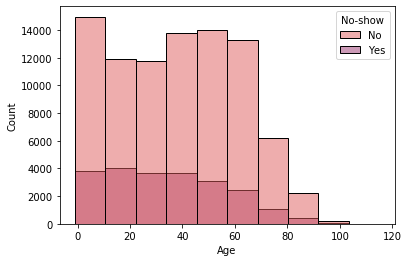

In [90]:
sns.histplot(data=df, x="Age", bins=10, hue = 'No-show', palette = 'flare')

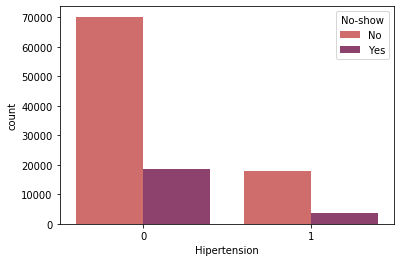

In [92]:
sns.countplot(data=df, x="Hipertension", hue = 'No-show', palette = 'flare')

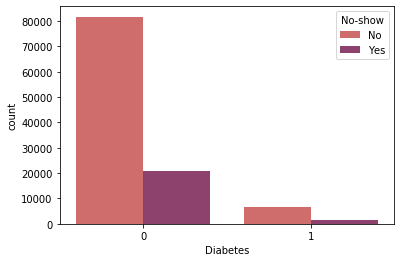

In [93]:
sns.countplot(data=df, x="Diabetes", hue = 'No-show', palette = 'flare')

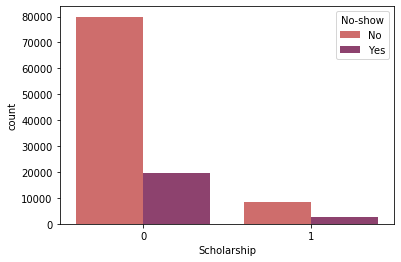

In [94]:
sns.countplot(data=df, x="Scholarship", hue = 'No-show', palette = 'flare')

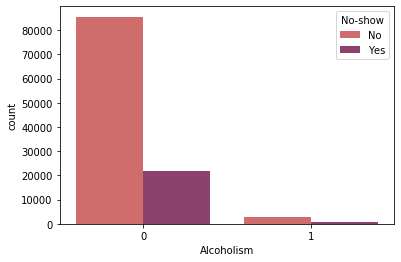

In [95]:
sns.countplot(data=df, x="Alcoholism", hue = 'No-show', palette = 'flare')

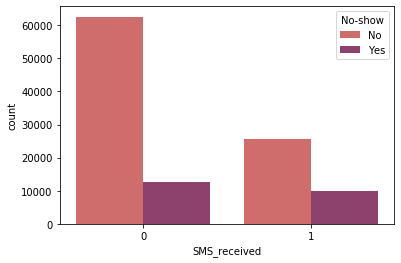

In [97]:
sns.countplot(data=df, x="SMS_received", hue = 'No-show', palette = 'flare')

<a id='questions'></a>
## Questions
Based on dataset analysis, I will focus on putting more light on answers to the following questions:
1. At what part of the day did most patient book their appointments the most
2. How many percent of patients missed their scheduled appointment?
3. What is the gender distribution for show / no-show patients?
4. Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?
5. What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

<a id='eda'></a>
## Exploratory Data Analysis

> I have trimmed and cleaned your data, let's move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1. At what part of the day did most patient book their appointments the most?

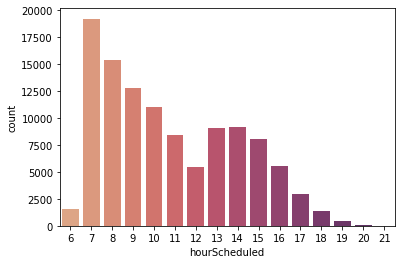

In [110]:
ax = sns.countplot(x="hourScheduled", data=df, palette="flare")

> From the above, we can see that most of the appointments were scheduled betwen 7:00am and 10:00am 
>
> Below, we can also see the amount of people that showed up at each scheduled time.

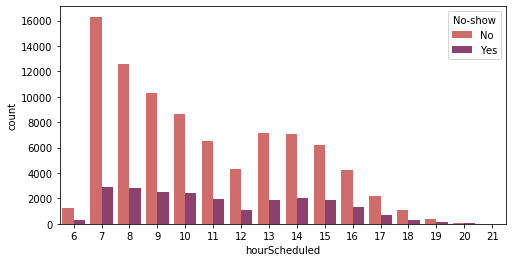

In [111]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="hourScheduled",hue='No-show', data=df, palette="flare")

> Most people tend to miss their appotments between 7 to 10 am in the morning

> And most people also show up to their appointment at that time also

### 2. How many percent of patients missed their scheduled appointment?

In [101]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

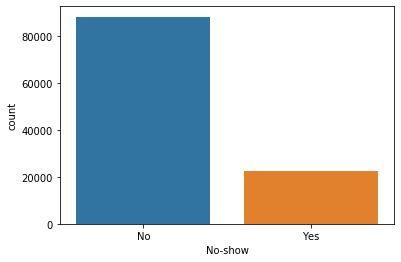

In [98]:
sns.countplot(data=df, x = 'No-show')

In [106]:
df['PatientId'].count()

110527

In [109]:
# percentage of people that mssed their appointments
(df['No-show'].value_counts()['Yes'])/(df['No-show'].count())

0.20193255946510807

> 22319 out of 110527 Patients missed their appointments

> This amounts to 20.19% of total patients 

### 3. What is the gender distribution for show / no-show patients?

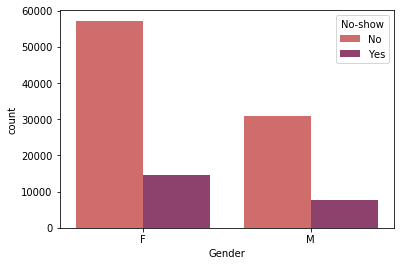

In [91]:
sns.countplot(data=df, x="Gender", hue = 'No-show', palette = 'flare')

> Generally, Females have more medical appointments than males

> Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.

> Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%

### 4. Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?

In [115]:
df.PatientId.value_counts().iloc[0:10]

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
Name: PatientId, dtype: int64

There are patients with multiple appointments. The number of appointments of top 10 patients range from 88 to 55. Taking into consideration, that the time range of visits appointed spans over 1.5 months, an appointment is most likely each examination or each specialist visit. So within one patient visit in a hospital, there could be multiple appointments scheduled. One of the no-show reasons could be the fact, that patients could be too tired to take part in all examinations during a particular visit, or the open hours were not sufficient to show up in all appointments. There could be also other reasons. The high number of appointments over so short period of time should be consulted with an SME to decide if performing (or not) additional analysis in this area makes sense.

### 5. What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

In [124]:
# seperate categorical variables
categorical_vars = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

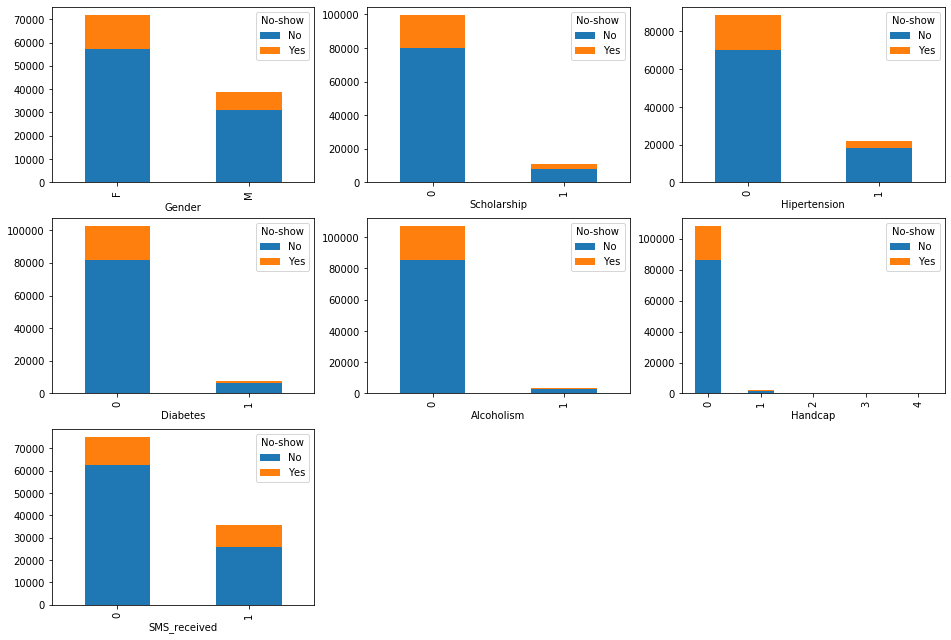

In [125]:
# PLOT ALL AGAINST THE NO_SHOW AXIS
fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No-show'])[var].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True)


> For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories

<a id='conclusions'></a>
## Conclusions

I have explored the dataset and managed a few problems like, dealing with column types, seperating date and time, removing wrong data, adding new features based on existing data. I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (No-show). As this was only an exploratory analysis, many potential correlations may remain uncovered. The data should be investigated further with more advanced statistical analysis to potentially reveal new insights and correlations.

The most important findings are:

- The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
- Most of the patients are not alcoholics.
- Most of the patients are not diabetes but more than alcoholics.
- There are for handicap categories with most of the people not being handicapted.
- Most patients do not have hypertension diagnosed.
- On average, 20% of appointments were missed.
- Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.
- Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%.
- There are patients with multiple appoinpments. The number appointments of top 10 patients range from 88 to 55. Taking into consideration, that the time range of visits appointed spans over 3 months, an appointment is most likely each examination or each specialist visit. So within one patient visit in a hospital, there could be multiple appointments scheduled. One of the no-show reasons could be the fact, that patients could be too tired to take part in all examinations during a particular visit, or the open hours were not sufficient to show up in all appointments. There could be also other reasons. The high number of appointments over so short period of time should be consulted with an SME to perform (or not) additional analysis in this area.
- For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.
